In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices #model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
heart = pd.read_csv('heart.csv')
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- age 
- sex: gender (1=male, 0= female)
- cp: chest pain type ( 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results(0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV, 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment ( 1: upsloping, 2: flat)
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: diagnosis of heart disease (angiographic disease status) 0: < 50% diameter narrowing, 1: > 50% diameter narrowing

In [ ]:
#Tim va toi uu hoa mo hinh logistic regression cho khả năng bị hẹp van tim hay la ko (target)?
#check xem mo hinh du bao nhu the nao?

In [2]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

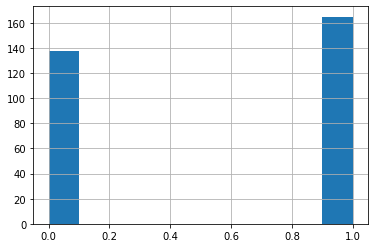

In [4]:
heart['target'].hist()

In [5]:
heart['target'] = (heart.target > 0).astype(int)
heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


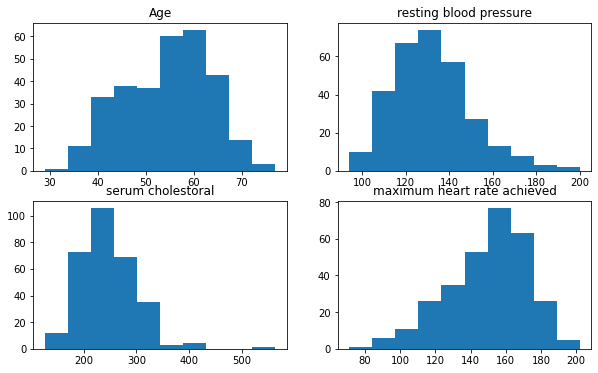

In [27]:
%matplotlib inline
fig, axs = plt.subplots(2,2)
fig.set_figwidth(10)
fig.set_figheight(6)
axs[0, 0].hist(heart.age)
axs[0, 0].set(title='Age')
axs[0, 1].hist(heart.trestbps)
axs[0, 1].set(title='resting blood pressure')
axs[1, 0].hist(heart.chol)
axs[1, 0].set(title='serum cholestoral')
axs[1, 1].hist(heart.thalach)
axs[1, 1].set(title= 'maximum heart rate achieved')
plt.show()

In [28]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [29]:
y, X = dmatrices('target ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach \
                 + exang + oldpeak + slope + ca + thal',
                heart, return_type ="dataframe")
print(X.columns)

Index(['Intercept', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [30]:
model = sm.Logit(y,X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:                  0.4937
Time:                        13:55:33   Log-Likelihood:                -105.72
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.262e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4505      2.571      1.342      0.180      -1.590       8.490
age           -0.0049      0.

In [31]:
#remove age, trestbps, chol, fbs, restecg, slope
y, X = dmatrices('target ~ sex + cp + trestbps + thalach + exang + oldpeak + ca + thal', 
                 heart, return_type="dataframe")

In [34]:
model = LogisticRegression()
model = model.fit(X, y);

C:\Users\tocba\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\tocba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
model.score(X, y)

0.8481848184818482

<AxesSubplot:>

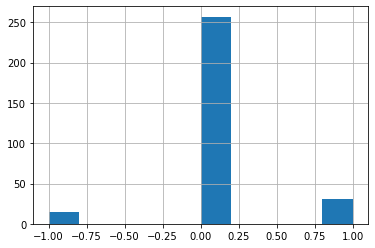

In [36]:
Y_Pred = model.predict(X)
Y_Pred = pd.DataFrame(Y_Pred)
residuals = Y_Pred[0] - y['target']
residuals.hist()

In [37]:
probs = model.predict_proba(X)
print(probs[:10])
print(Y_Pred[:10])

[[0.11957609 0.88042391]
 [0.29698445 0.70301555]
 [0.08307376 0.91692624]
 [0.13511093 0.86488907]
 [0.22845347 0.77154653]
 [0.28861103 0.71138897]
 [0.1465222  0.8534778 ]
 [0.1808766  0.8191234 ]
 [0.30003564 0.69996436]
 [0.1786171  0.8213829 ]]
     0
0  1.0
1  1.0
2  1.0
3  1.0
4  1.0
5  1.0
6  1.0
7  1.0
8  1.0
9  1.0


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)

C:\Users\tocba\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\tocba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
predicted = model.predict(X_test)

[[32 12]
 [ 6 41]]


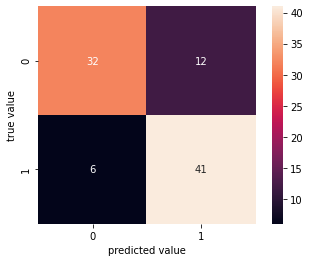

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(y_test, predicted)
print(cf_matrix)
sns.heatmap(cf_matrix,square=True,fmt ='d', annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [42]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.84      0.73      0.78        44
         1.0       0.77      0.87      0.82        47

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

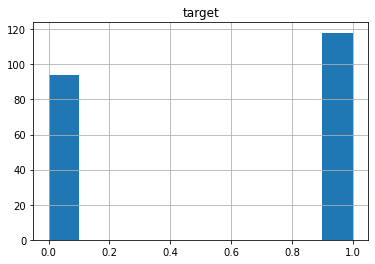

In [43]:
y_train.hist()

<AxesSubplot:>

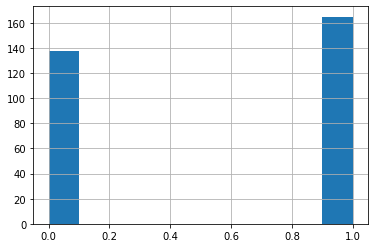

In [44]:
y['target'].hist()

In [ ]:
#mo hinh du bao tuong doi chinh xac